# Estrategia Reversión A la media

### Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [ ]:
### Acciones que componen el Indice Nasdaq

In [ ]:
assets = ['ADBE', 'AMD', 'ABNB', 'ALGN', 'GOOGL', 'AEP', 'AMGN', 'ADI', 'ANSS', 'AMAT', 'ASML', 'AZN', 'TEAM', 'ADSK', 'ADP', 'BKR', 'BIIB', 'BKNG', 'AVGO', 'CDNS', 'CHTR', 'CTAS', 'CSCO', 'CTSH', 'CMCSA', 'CEG', 'CPRT', 'CSGP', 'COST', 'CRWD', 'CSX', 'DDOG', 'DXCM', 'FANG', 'EBAY', 'EA', 'ENPH', 'EXC', 'FAST', 'FTNT', 'GEHC', 'GILD', 'GFS', 'HON', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG', 'KDP', 'KLAC', 'KHC', 'LRCX', 'LCID', 'LULU', 'MAR', 'MRVL', 'MELI', 'META', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MNST', 'NFLX', 'NXPI', 'ORLY', 'ODFL', 'ON', 'PCAR', 'PANW', 'PAYX', 'PYPL', 'PEP', 'PDD', 'QCOM', 'REGN', 'ROST', 'SGEN', 'SIRI', 'SBUX', 'SNPS', 'TMUS', 'TXN', 'TTD', 'VRSK', 'VRTX', 'WBA', 'WBD', 'WDAY', 'XEL', 'ZM', 'ZS']

In [1]:

start = datetime(2023, 1, 1)
end = datetime(2023, 9, 15)

WMA = 5
weights = np.arange(1, WMA + 1)  # Pesos del 1 al WMA
N = 1

results = []

for asset in assets:
    # Descarga de datos
    data = yf.download(asset, start=start, end=end)
    
    # Creación de columnas en el DataFrame
    ## Se contruyen las señales con un enfoque en la desviacion estandar de la WMA
    data['price'] = data['Adj Close']
    data['WMA'] = data['price'].rolling(window=WMA).apply(lambda x: np.sum(x * weights) / np.sum(weights), raw=True)
    data['STD'] = N * data['price'].rolling(window=WMA).std()
    data['WMA+STD'] = data['WMA'] + data['STD']
    data['WMA-STD'] = data['WMA'] - data['STD']
    
    data['position'] = np.where(data['price'] > data['WMA+STD'], -1, 0)
    data['position'] = np.where(data['price'] < data['WMA-STD'], 1, data['position'])
    data['position'] = data['position'].fillna(0)                                                                 
    data['returns'] = data['price'] / data['price'].shift(1)
    data['strategy'] = data['returns'] ** data['position'].shift(1)
    
    # Rendimiento total discreto
    ret = data[['returns', 'strategy']].dropna().cumprod().iloc[-1]
    
    results.append([asset, ret['returns'], ret['strategy']])

results_df = pd.DataFrame(results, columns=['Asset', 'Returns', 'Strategy'])

# Filtrar los activos donde la estrategia superó al rendimiento
outperforming_assets = results_df[results_df['Strategy'] > results_df['Returns']]

print(outperforming_assets)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

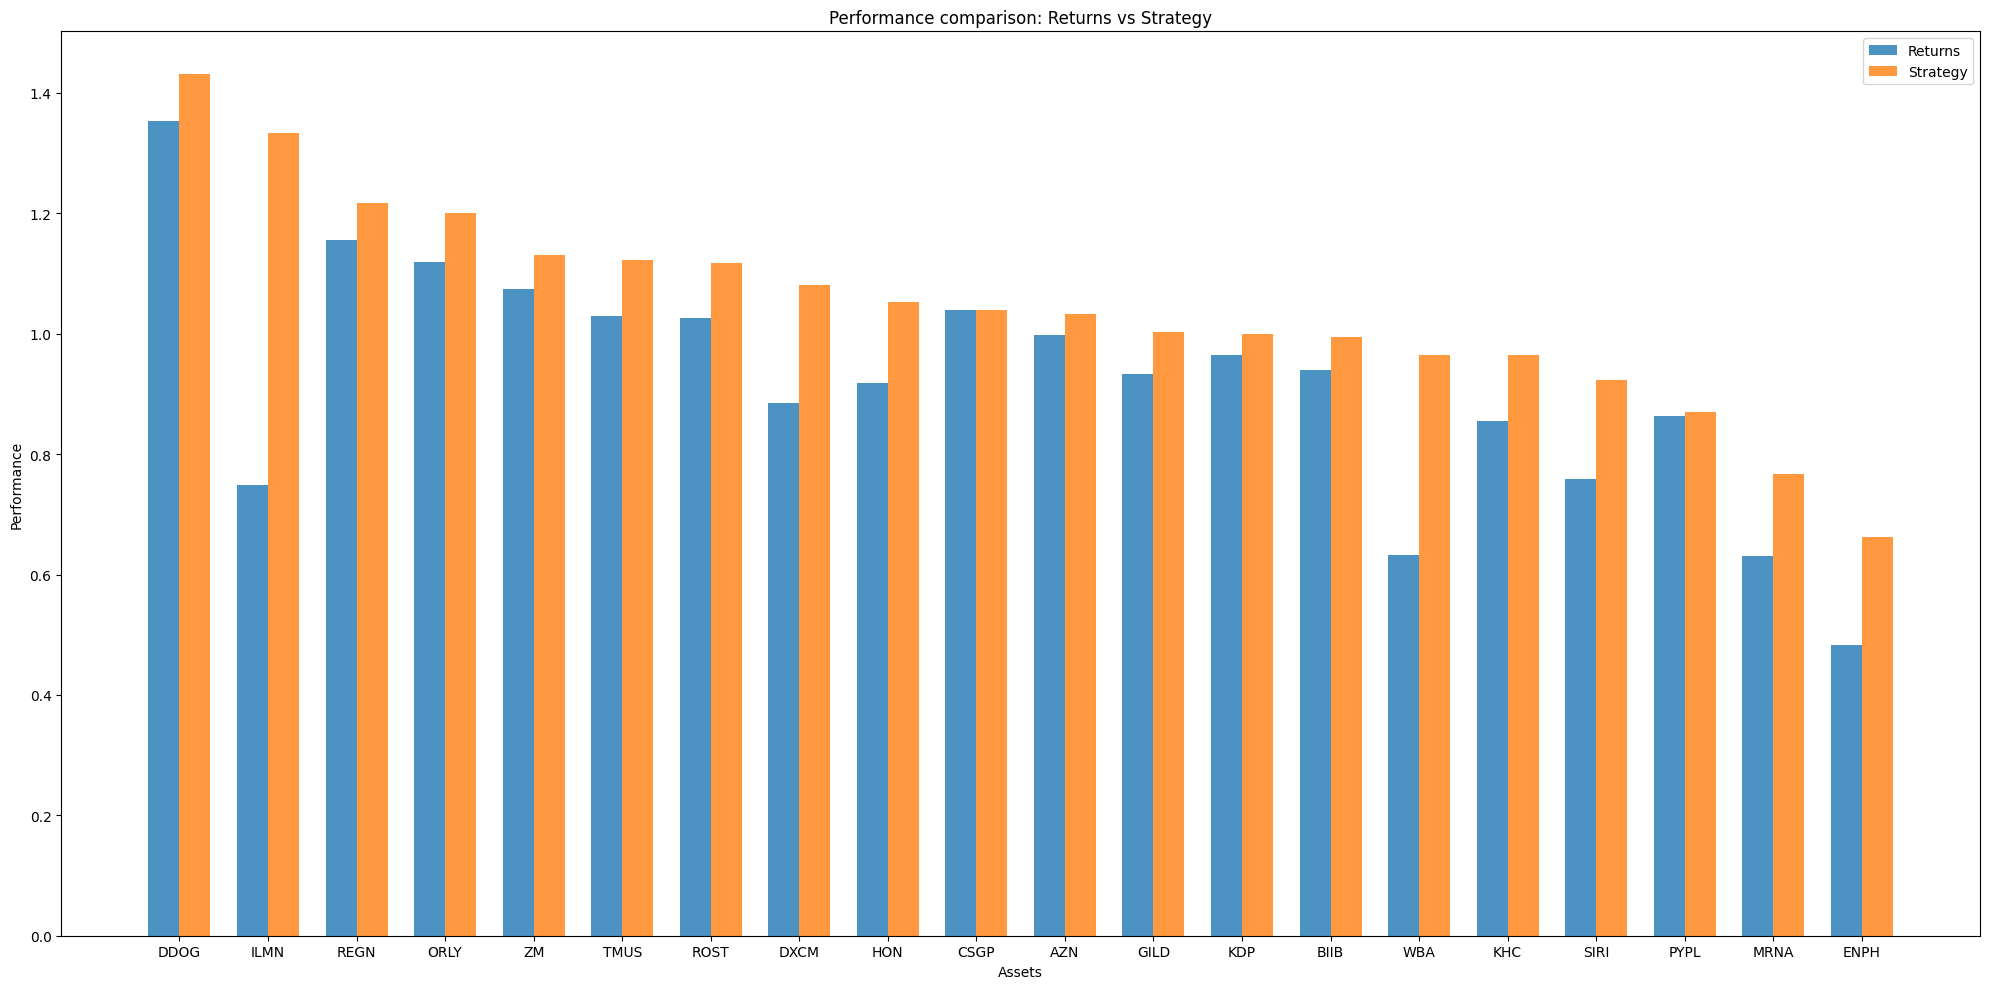

In [2]:

# Graficar
plt.figure(figsize=(20, 10))

# Acomodar los activos por rendimiento en la estrategia para que el gráfico esté ordenado
sorted_assets = outperforming_assets.sort_values(by='Strategy', ascending=False)

# Bar plot
bar_width = 0.35
index = np.arange(len(sorted_assets))

bar1 = plt.bar(index, sorted_assets['Returns'], bar_width, label='Returns', alpha=0.8)
bar2 = plt.bar(index + bar_width, sorted_assets['Strategy'], bar_width, label='Strategy', alpha=0.8)

# Agregar etiquetas, título, leyendas, etc.
plt.xlabel('Assets')
plt.ylabel('Performance')
plt.title('Performance comparison: Returns vs Strategy')
plt.xticks(index + bar_width / 2, sorted_assets['Asset'])  # poner etiquetas en el medio de los grupos de barras
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### Al analizar el histograma se evidencia que la accion  ILMN ha tenido un buen desempeño en el año 2023 siguiendo la estrategia de reversión a la media, por lo que realizamos el análisis nuevamente pero de manera individual para ver gráficamente su comportamiento.

[*********************100%%**********************]  1 of 1 completed


/var/folders/g6/m080qbhn12g9kv9f6j1gmt7c0000gq/T/ipykernel_86142/283195183.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: xlabel='Date'>

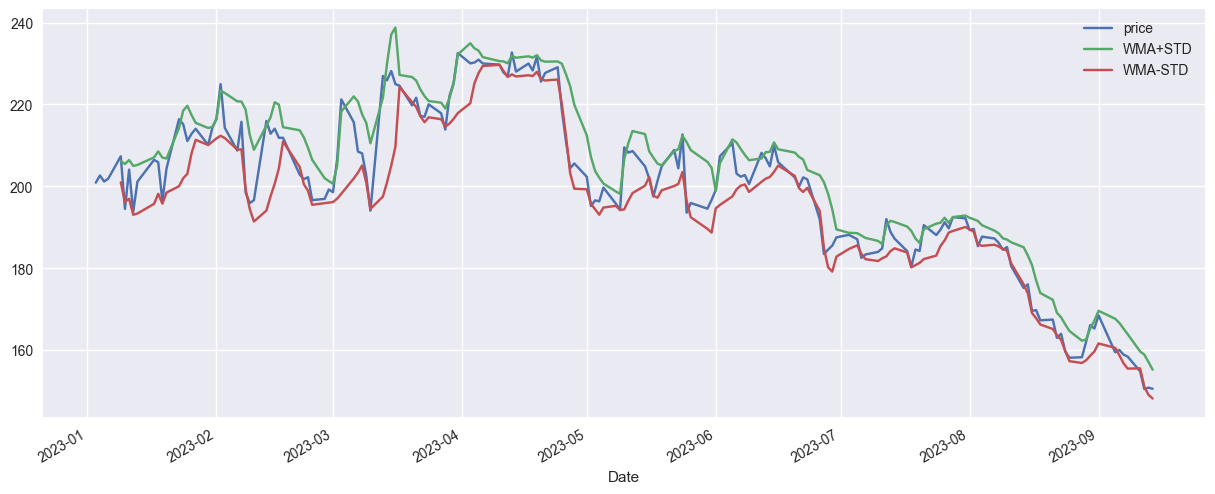

In [7]:
#Definición de fechas:
start = datetime(2023,1,1)
end = datetime(2023,9,15)
#Descarga de datos:
data = yf.download('ILMN', start=start, end=end)
#Creación de columnas en el DataFrame:
data['price'] = data['Adj Close']
# se Define el período de la media móvil simple (WMA) como 25 días.
WMA=5
weights = np.arange(1, WMA + 1)  # Pesos del 1 al WMA
data['WMA'] = data['price'].rolling(window=WMA).apply(lambda x: np.sum(x * weights) / np.sum(weights), raw=True)

# Se Define un factor multiplicador para la desviación estándar como 1.
N=1
data['STD'] = N*data['price'].rolling(window=WMA).std()
data['WMA+STD'] = data['WMA'] + data['STD']
data['WMA-STD'] = data['WMA']- data['STD']
plt.style.use('seaborn')
data[['price','WMA+STD','WMA-STD']].plot(figsize=(15,6))

<Axes: xlabel='Date'>

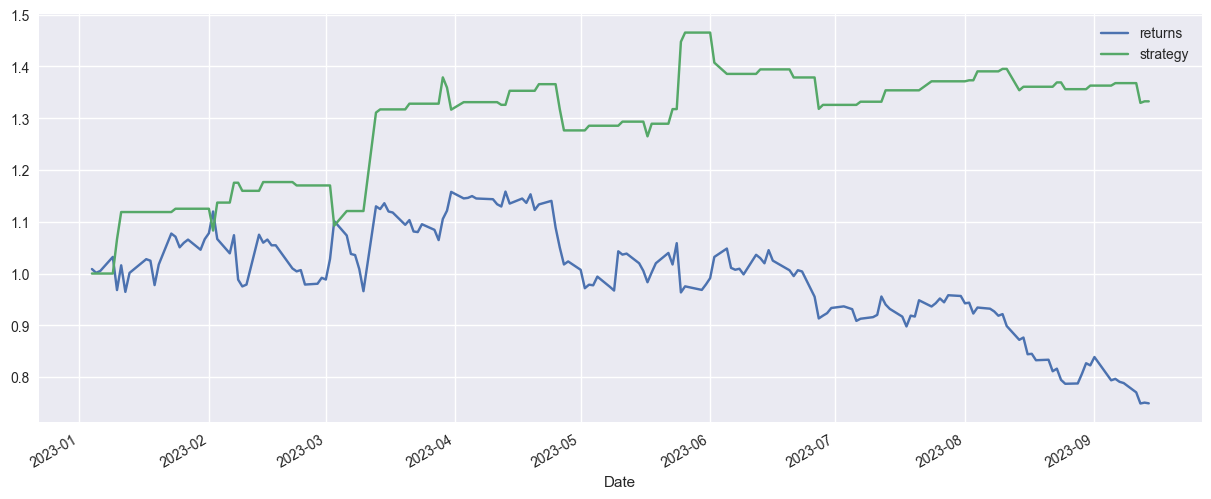

In [8]:

data['position'] = np.where(data['price'] > data['WMA+STD'],-1, 0)
data['position'] = np.where(data['price'] < data['WMA-STD'], 1, data['position'])
data['position' ]= data['position'].fillna(0)                                                                 
data['returns'] = data['price']/data['price'].shift(1)
data['strategy']= data['returns'] ** data['position'].shift(1)
data[['returns','strategy']].dropna().cumprod().plot(figsize=(15,6))